In [83]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import os

from env import host, user, password

In [5]:
#1. Acquire customer_id, monthly_charges, tenure, and total_charges from telco_churn database for all 
# customers with a 2 year contract.

def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def new_telco_data():
    '''
    This function reads the telco_churn data from the Codeup db into a df,
    write it to a csv file, and returns the df.
    '''
    # Create SQL query.
    sql_query = ''' select customer_id, monthly_charges, tenure, total_charges
                    from customers
                    where contract_type_id = 2;
                    '''
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('telco_churn'))
    
    return df

def get_telco_data(cached=False):
    '''
    This function reads in telco_churn data from Codeup database and writes data to
    a csv file if cached == False or if cached == True reads in telco df from
    a csv file, returns df.
    '''
    if cached == False or os.path.isfile('telco_df.csv') == False:
        
        # Read fresh data from db into a DataFrame.
        df = new_telco_data()
        
        # Write DataFrame to a csv file.
        df.to_csv('telco_df.csv')
        
    else:
        
        # If csv file exists or cached == True, read in data from csv.
        df = pd.read_csv('telco_df.csv', index_col=0)
        
    return df

In [40]:
telco = get_telco_data()
telco.head()

,customer_id,monthly_charges,tenure,total_charges
0,0002-ORFBO,65.60,9,593.3
1,0020-JDNXP,61.25,34,1993.2
2,0022-TCJCI,62.70,45,2791.5
3,0023-UYUPN,25.20,50,1306.3
4,0036-IHMOT,103.70,55,5656.75


In [41]:
#2. Walk through the steps above using your new dataframe. You may handle the missing values
# however you feel is appropriate.
telco.shape

(1473, 4)

In [42]:
telco.describe()

,monthly_charges,tenure
count,1473.000000,1473.000000
mean,65.048608,42.044807
std,31.840539,19.035883
min,18.250000,0.000000
25%,26.900000,27.000000
50%,68.750000,44.000000
75%,94.800000,58.000000
max,118.600000,72.000000


In [43]:
telco.info()
#total charges is object, deal with it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1473 non-null   object 
 1   monthly_charges  1473 non-null   float64
 2   tenure           1473 non-null   int64  
 3   total_charges    1473 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 46.2+ KB


In [44]:
telco.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [49]:
print(telco.isnull().sum())

customer_id        0
monthly_charges    0
tenure             0
total_charges      1
dtype: int64


In [46]:
print(telco.columns[telco.isnull().any()])

Index(['total_charges'], dtype='object')


In [47]:
telco.total_charges.value_counts(sort=True, ascending=True)

2038.7     1
2882.25    1
5301.1     1
7674.55    1
3173.35    1
          ..
592.65     2
854.9      2
727.8      2
3187.65    2
989.05     2
Name: total_charges, Length: 1467, dtype: int64

In [52]:
telco = telco.dropna()
telco.shape

(1472, 4)

In [54]:
telco['total_charges'] = telco.total_charges.astype(float)
telco.dtypes

customer_id         object
monthly_charges    float64
tenure               int64
total_charges      float64
dtype: object

In [55]:
telco.describe()

,monthly_charges,tenure,total_charges
count,1472.000000,1472.00000,1472.000000
mean,65.079416,42.07337,3034.683084
std,31.829391,19.01075,2229.730075
min,18.250000,1.00000,18.800000
25%,28.812500,27.00000,989.350000
50%,68.750000,44.00000,2657.550000
75%,94.812500,58.00000,4859.525000
max,118.600000,72.00000,8684.800000


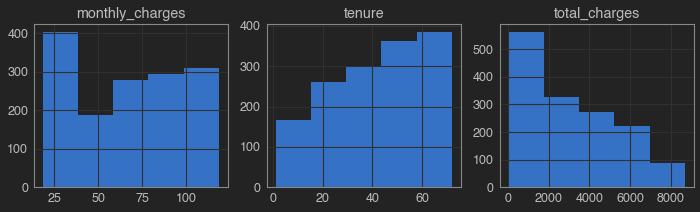

In [60]:
from jupyterthemes import jtplot
jtplot.style()

plt.figure(figsize=(16, 3))

for i, col in enumerate(list(telco.columns[1:])):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = telco[col]  
    plt.subplot(1,4, plot_number)
    plt.title(col)
    series.hist(bins=5)

In [58]:
telco.columns[1:]

Index(['monthly_charges', 'tenure', 'total_charges'], dtype='object')

<AxesSubplot:>

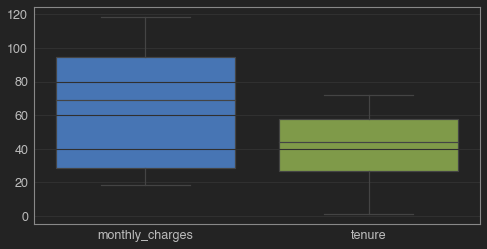

In [66]:
plt.figure(figsize=(8,4))
sns.boxplot(data=telco.drop(columns=['customer_id', 'total_charges']))

<AxesSubplot:>

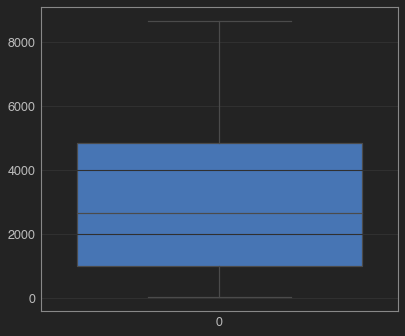

In [67]:
sns.boxplot(data=telco.total_charges)

In [93]:
def acquire_telco(cached=False):
    '''
    This function reads in telco_churn data from Codeup database and writes data to
    a csv file if cached == False or if cached == True reads in telco df from
    a csv file, returns df.
    '''
    if cached == False or os.path.isfile('telco_df.csv') == False:
        
        # Read fresh data from db into a DataFrame.
        df = new_telco_data()
        
        # Write DataFrame to a csv file.
        df.to_csv('telco_df.csv')
        
    else:
        
        # If csv file exists or cached == True, read in data from csv.
        df = pd.read_csv('telco_df.csv', index_col=1)
        df = df.drop(columns='Unnamed: 0')
        
    return df

In [78]:
def clean_telco(df):
    '''Takes in a df of telco data and cleans the data by replacing blanks and dropping null values. 
    The total_charges column is then converted to float
    
    return: df, a cleaned pandas dataframe'''
    df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
    df = df.dropna()
    df['total_charges'] = df.total_charges.astype(float)
    return df

In [85]:
def split_telco(df, stratify_by=None):
    """
    Crude train, validate, test split
    To stratify, send in a column name
    """
    
    if stratify_by == None:
        train, test = train_test_split(df, test_size=.2, random_state=123)
        train, validate = train_test_split(df, test_size=.3, random_state=123)
    else:
        train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[stratify_by])
        train, validate = train_test_split(train_validate, test_size=.3, random_state=123, stratify=train_validate[stratify_by])
    
    return train, validate, test

In [88]:
def wrangle_telco():
    '''
    wrangle_telco will read in our student grades as a pandas dataframe,
    clean the data
    split the data
    return: train, validate, test sets of pandas dataframes from telco, stratified on total_charges
    '''
    df = clean_telco(acquire_telco(cached=True))
    return split_telco(df)

    

In [96]:
train, validate, test = wrangle_telco()
train.head()

,monthly_charges,tenure,total_charges
customer_id,,,
5170-PTRKA,35.80,49,1782.00
3351-NQLDI,94.35,67,6341.45
2592-HODOV,19.30,13,259.65
1708-PBBOA,54.75,42,2348.45
1543-LLLFT,98.30,61,6066.55
